<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Optimal-Transport-with-Linear-Programming" data-toc-modified-id="Optimal-Transport-with-Linear-Programming-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Optimal Transport with Linear Programming</a></span><ul class="toc-item"><li><span><a href="#Optimal-Assignment" data-toc-modified-id="Optimal-Assignment-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Optimal Assignment</a></span></li><li><span><a href="#Kantorovich-Problem" data-toc-modified-id="Kantorovich-Problem-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Kantorovich Problem</a></span></li></ul></li><li><span><a href="#Entropic-Regularization-of-Optimal-Transport" data-toc-modified-id="Entropic-Regularization-of-Optimal-Transport-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Entropic Regularization of Optimal Transport</a></span><ul class="toc-item"><li><span><a href="#Transport-between-point-clouds" data-toc-modified-id="Transport-between-point-clouds-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Transport between point clouds</a></span></li><li><span><a href="#Transport-between-histogramms" data-toc-modified-id="Transport-between-histogramms-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Transport between histogramms</a></span></li><li><span><a href="#Transport-between-histogramms-(GPU-version)" data-toc-modified-id="Transport-between-histogramms-(GPU-version)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Transport between histogramms (GPU version)</a></span></li><li><span><a href="#Wasserstein-Barycenters" data-toc-modified-id="Wasserstein-Barycenters-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Wasserstein Barycenters</a></span></li></ul></li><li><span><a href="#Advanced-Topics-on-Sinkhorn-Algorithm" data-toc-modified-id="Advanced-Topics-on-Sinkhorn-Algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Advanced Topics on Sinkhorn Algorithm</a></span><ul class="toc-item"><li><span><a href="#Log-domain-Sinkhorn" data-toc-modified-id="Log-domain-Sinkhorn-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Log-domain Sinkhorn</a></span></li><li><span><a href="#Wasserstein-Flow-for-Matching" data-toc-modified-id="Wasserstein-Flow-for-Matching-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Wasserstein Flow for Matching</a></span></li></ul></li></ul></div>

In this report we draw inspiration from the four numerical tours for Optimal Transport and apply the techniques to our own datasets to get new numerical results. 


$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

$\DeclareMathOperator{\KL}{KL}
\newcommand{\KLdiv}[2]{\KL\pa{#1 | #2}}
\newcommand{\KLproj}{\text{Proj}^{\tiny\KL}}
\renewcommand{\epsilon}{\varepsilon}
\def\ones{\mathbb{I}}$


# Optimal Transport with Linear Programming

We will the World Cities Database available at https://simplemaps.com/data/world-cities.

This dataset contains lat/long positions for 12959 cities in the world. We can thus use it to model two discrete optimal transport problems.

We can see two groups of cities as two discrete distributions:
$$ \alpha = \sum_{i=1}^n a_i \delta_{x_i} \quad
   \beta = \sum_{j=1}^m b_j \delta_{y_j}. $$

$x_i$ is the 2D position of the city in $\mathbb{R}^2$ and $a_i$ could be proportional to its size for example or just uniform weights.

We will perform two experiments:

- Optimal assignment. We considere two groups of cities of the same size: 57 cities in France (the source) and 19 cities from Spain, England and Germany (the target). We will imagine the following experiments: the mayors from the 57 cities wants to meet the mayors from the 19 cities in Spain, England and Germany. We want to find the optimal permutation that minimize the total distance travelled by the french mayors. This is an optimal assignment problem since m = 19*3 = 57 and n = 57.

- Kantorovich problem. Instead of making mayors travel we want to send ressources from the 50 biggest cities in france to the 30 biggest cities in  Spain, Germany and England. This is not an optimal assignment problem anymore since n = 50 < m = 90 and we authorize to split the masses when transporting. We will assign weights proportional to the population of the city.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import pandas as pd
print(cp.__version__)

1.0.25


## Optimal Assignment 

**Data**

The dataset includes 12959 cities in the world with various information: position (lat/long), code name, population, country and administrative status.

In [2]:
df = pd.read_csv("worldcities.csv")
print("Number of cities : {}".format(len(df)))
df.head()

Number of cities : 12959


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Malishevë,Malisheve,42.4822,20.7458,Kosovo,XK,XKS,Malishevë,admin,NaN,1901597212
1,Prizren,Prizren,42.2139,20.7397,Kosovo,XK,XKS,Prizren,admin,NaN,1901360309
2,Zubin Potok,Zubin Potok,42.9144,20.6897,Kosovo,XK,XKS,Zubin Potok,admin,NaN,1901608808
3,Kamenicë,Kamenice,42.5781,21.5803,Kosovo,XK,XKS,Kamenicë,admin,NaN,1901851592
4,Viti,Viti,42.3214,21.3583,Kosovo,XK,XKS,Viti,admin,NaN,1901328795


We will only keep the cities that are of interest to us (57 cities in France and 19 cities in England, Spain and Germany) and then we only keep the lat/lng columns to construct the cost matrix.

In [3]:
n = 57
# Get 57 biggest cities in France and 19 biggest cities in Spain, Germany and England
df = df[(df.city != "Las Palmas")&(df.city != "Santa Cruz de Tenerife")]
df_FR = df[df.iso2=="FR"].sort_values("population").iloc[-n:,:].sample(frac=1)
df_DE = df[df.iso2=="DE"].sort_values("population", ascending=False).iloc[:n//3,:].sample(frac=1)
df_ES = df[df.iso2=="ES"].sort_values("population", ascending=False).iloc[:n//3,:].sample(frac=1)
df_GB = df[df.iso2=="GB"].sort_values("population", ascending=False).iloc[:n//3,:].sample(frac=1)

# Keep only lat/long variables
df_FR.index = df_FR.city_ascii
df_FR = df_FR[["lng","lat"]]
df_DE.index = df_DE.city_ascii
df_DE = df_DE[["lng","lat"]]
df_ES.index = df_ES.city_ascii
df_ES = df_ES[["lng","lat"]]
df_GB.index = df_GB.city_ascii
df_GB = df_GB[["lng","lat"]]

# Convert to numpy array
X = df_FR.values.T
Y = np.hstack([df_DE.values.T,df_ES.values.T,df_GB.values.T])
print(X.shape, Y.shape)

# Some labels for display
label = {"Paris":(-1,df_FR.index.to_list().index("Paris")),
         "Berlin":(0,df_DE.index.to_list().index("Berlin")),
         "Madrid":(1,df_ES.index.to_list().index("Madrid")),
         "London":(2,df_GB.index.to_list().index("London")),
        }

(2, 57) (2, 57)


**Data Visualisation**

The data forms a center cluster (France) and three external clusters (England/Spain/Germany).

In [4]:
myplot = lambda x,y,ms,col, name=None: plt.scatter(x,y, s=ms*20, edgecolors="k", c=col, linewidths=2,alpha=0.7)

def plot_map(X,Y, P=None, label=[], balanced=True, a=None, b=None,tol=(0,0)):
    '''Helper function to plot the cities in the balanced or unbalanced scenario
    If P is given it will display the connections'''
    
    plt.figure(figsize = (12,9))
    plt.axis('off')
    
    if type(P)==np.ndarray:
        if tol[0]==0:
            I,J = np.nonzero(P>1e-5)
            for k in range(len(I)):
                h = plt.plot(np.hstack((X[0,I[k]],Y[0,J[k]])),np.hstack(([X[1,I[k]], Y[1,J[k]]])),'k', lw = 2, alpha=0.5)
        else:
            # Strong connections
            A = P * (P > np.max(P)*tol[1])
            i,j = np.where(A != 0)
            plt.plot([X[0,i],Y[0,j]],[X[1,i],Y[1,j]],'k',lw = 2)

            # Weaker connections
            A = P * (P > np.max(P)*tol[0])
            i,j = np.where(A != 0)
            plt.plot([X[0,i],Y[0,j]],[X[1,i],Y[1,j]],'k:',lw = 1)  
            
    if balanced:
        myplot(X[0,:],X[1,:],5,'b', )
        myplot(Y[0,:],Y[1,:],5,'r')
    else:
        for i in range(len(a)):
            myplot(X[0,i], X[1,i], a[i]*len(a)*10, 'b')
        for j in range(len(b)):
            myplot(Y[0,j], Y[1,j], b[j]*len(b)*10, 'r')
    
    for c in label:
        m = Y.shape[1]
        if label[c][0]==-1:
            plt.annotate(c, (X[0,label[c][1]], X[1,label[c][1]]), size=16, color="orange")
        else:
            plt.annotate(c, (Y[0,label[c][1]+m//3*label[c][0]], Y[1,label[c][1]+m//3*label[c][0]]), size=14, color="orange")
            
    plt.xlim(min(np.min(Y[0,:]), np.min(X[0,:]))-1 ,max(np.max(Y[0,:]), np.max(X[0,:]))+1)
    plt.ylim(min(np.min(Y[1,:]), np.min(X[1,:]))-1 ,max(np.max(Y[1,:]), np.max(X[1,:]))+1)
    
    plt.show()

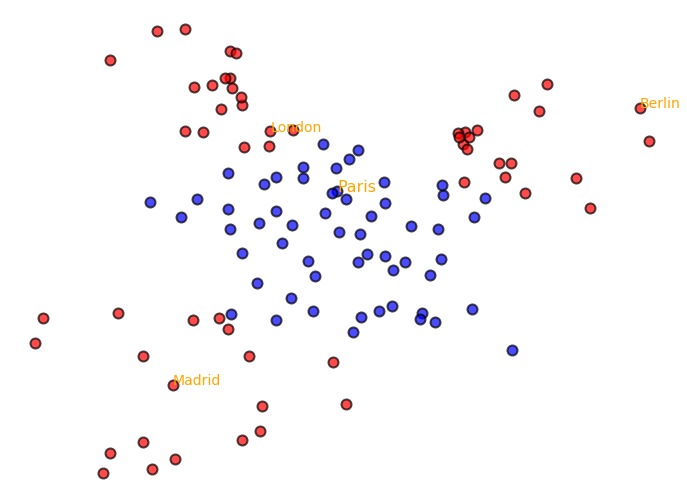

In [5]:
plot_map(X,Y,label=label)

**Cost Matrix**

We build the cost matrix to be the pairwise geographical distances between the cities with respect to their lat/long coordinates. The haversine formula calculates the great-circle distance between two points – that is, the shortest distance over the earth’s surface – giving an ‘as-the-crow-flies’ distance between the points.

Let $R$ be the radius of the earth in km ($R=6373$). We introduce the following notations, $$\phi(x_i) = lat(x_i)$$ $$\Delta \phi_{i,j} = \phi(x_i) - \phi(y_j)$$ $$\psi(x_i) = long(x_i)$$ $$\Delta \psi_{i,j} = \psi(x_i) - \psi(y_j)$$ $$a(x_i,y_j) = \sin(\Delta \phi_{i,j}/2)^2 + \cos(\phi(x_i))\cos(\phi(y_j))\sin(\Delta \psi_{i,j}/2)^2$$ $$c(x_i,y_j) = 2 ⋅ atan2(\sqrt{a(x_i,y_j)}, \sqrt{1−a(x_i,y_j)})$$

Then, 
$$C_{i,j} := R \times c(x_i,y_j)$$

In [6]:
from math import sin, cos, sqrt, atan2, radians

def get_distance_from_lat_long(arr1, arr2):
    '''From two arrays of long/lat coordinates return their pairwise distance in kilometers'''
    
    # approximate radius of earth in km
    R = 6373.0
    n = arr1.shape[1]
    m = arr2.shape[1]
    distance_mat = np.zeros((n,m))
    
    for i in range(n):
        for j in range(m):
            
            lat1, lon1, lat2, lon2 = map(radians, [arr1[1,i], arr1[0,i], arr2[1,j], arr2[0,j]])
            
            dlon = lon2 - lon1
            dlat = lat2 - lat1

            a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
            c = 2 * atan2(sqrt(a), sqrt(1 - a))

            distance = R * c
            distance_mat[i,j] = distance
            
    return distance_mat

In [7]:
# get cost matrix
C = get_distance_from_lat_long(X, Y)
print(C.shape)

# get uniform weights
a = np.ones([n,1])/n
b = a.copy()

(57, 57)


**Optimal Assignment Solution**

The Kantorovitch formulation of the optimal transport reads
$$ P^\star \in \uargmin{P \in U(a,b)} \sum_{i,j} P_{i,j} C_{i,j}.  $$

where
$$ U(a,b) := \enscond{ P \in \RR_+^{n \times m} }{
     \forall i, \sum_j P_{i,j} = a_i, \:
     \forall j, \sum_i P_{i,j} = b_j }. $$
is the set of discrete couplings between $\al$ and $\be$.

In the case where $n=m$ and the weights are uniform $a_{i}=1/n, b_{j}=1/n$, one can show that there is at least one optimal transport coupling which is actually a
**permutation matrix**. This properties comes from the fact that
the extremal point of the polytope $U(1,1)$ are permutation matrices.

This means that there exists an optimal permutation $\si^\star \in \Sigma_n$ such
that
$$ P^\star_{i,j} = \choice{
      1 \qifq j=\si^\star(i), \\
      0 \quad\text{otherwise}.
  } $$
  
where $\Si_n$ is the set of permutation (bijections) of
$\{1,\ldots,n\}$.


This permutation thus solves the so-called optimal assignement problem
$$ \si^\star \in \uargmin{\si \in \Sigma_n}
      \sum_{i} C_{i,\si(j)}. $$


Let's compute the optimal solution with two packages: `cvxpy` which is designed to solve convex problem like linear programming and then `POT` which is designed to solve various optimal transport problems. We then check that $P^*$ is indeed a permutation matrix.

In [9]:
def solve_cvxpy(C,a,b,precision=1e-6,verbose=True):
    
    n = len(a)
    m = len(b)
    P = cp.Variable((n,m))
    u = np.ones((m,1))
    v = np.ones((n,1))
    U = [0 <= P, cp.matmul(P,u)==a, cp.matmul(P.T,v)==b]
    objective = cp.Minimize( cp.sum(cp.multiply(P,C)) )
    prob = cp.Problem(objective, U)
    result = prob.solve(verbose=verbose, eps_abs=precision, eps_rel=precision)
   
    return result, P

Since QSQP uses an interior point method some elements might not be exactly 0 that is why we set the precision lower than default.

In [10]:
res, P = solve_cvxpy(C,a,b, precision=1e-8)

-----------------------------------------------------------------
           OSQP v0.6.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2019
-----------------------------------------------------------------
problem:  variables n = 3249, constraints m = 3363
          nnz(P) + nnz(A) = 9747
settings: linear system solver = qdldl,
          eps_abs = 1.0e-08, eps_rel = 1.0e-08,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.3242e+06   4.66e+00   7.82e+03   1.00e-01   3.07e-03s
 200   5.5084e+02   2.83e-05   3.65e+00   8.82e+00   1.35e-02s
 400   5.4944e+02   3.39e-06   3.20e-01   

The resulting matrix $P^*$ is thus a sparse matrix with only $n=57$ non zero elements.

Number of non-zero: 57


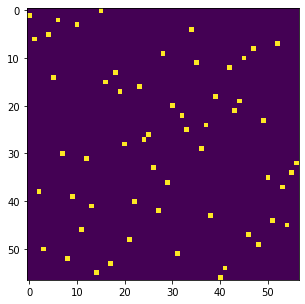

In [11]:
plt.figure(figsize = (5,5))
plt.imshow(P.value); 
for i in range(P.value.shape[0]):
    if (P.value[i,:]>10e-8).sum()!=1:
        print("More than one significant element on row {} in P".format(i))
print("Number of non-zero: %d" %(len(P.value[P.value>1e-8])))

We can then check that $P^*$ is a permutation matrix:

In [12]:
def is_permuation_matrix(x):
    '''Return true if x is a permutation matrix'''
    
    x = np.asanyarray(x)
    return (x.ndim == 2 and x.shape[0] == x.shape[1] and
            (x.sum(axis=0) == 1).all() and 
            (x.sum(axis=1) == 1).all() and
            ((x == 1) | (x == 0)).all())

P.value[P.value>10e-8]=1
P.value[P.value<=10e-8]=0
print("Is P a permutation matrix ?", is_permuation_matrix(P.value))

Is P a permutation matrix ? True


We then display the connections between the cities. Since $P^*$ is a permutation matrix, each city in the blue group is connected to exactly one city in the red group.

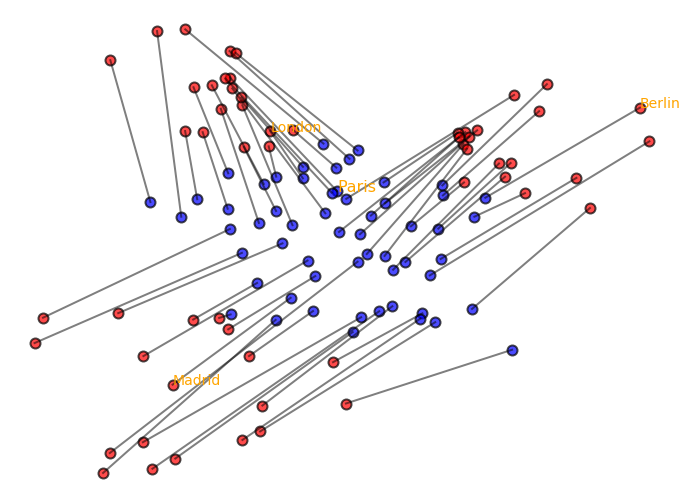

In [13]:
plot_map(X,Y,P.value,label)

**Comparison with POT code**

The syntax to solve the Kantorovich problem is quite simple.

In [14]:
import ot
Ppot = ot.emd(a.reshape(-1), b.reshape(-1), C)

For sanity check, let's check that it gives the same permutation matrix:

In [15]:
Ppot[Ppot>0] = 1
(Ppot==P.value).sum()==Ppot.size

True

## Kantorovich Problem

**Data**

Now we take 50 cities in france 30 cities in Spain, Germany and England. This is not an assignment problem anymore since n = 50 and m = 90. We attribute weight histogram that are proportional to tu population of each city within the blue and red groups.

In [16]:
# Get 50 biggest cities in France and 30 biggest cities in Spain, Germany and England
n = 50
m = 90
df_FR = df[df.iso2=="FR"].sort_values("population").iloc[-n:,:].sample(frac=1)
df_DE = df[df.iso2=="DE"].sort_values("population", ascending=False).iloc[:m//3,:].sample(frac=1)
df_ES = df[df.iso2=="ES"].sort_values("population", ascending=False).iloc[:m//3,:].sample(frac=1)
df_GB = df[df.iso2=="GB"].sort_values("population", ascending=False).iloc[:m//3,:].sample(frac=1)
wFR = df_FR.population
wDE = df_DE.population
wES = df_ES.population
wGB = df_GB.population


# Keep only lat/long variables
df_FR.index = df_FR.city_ascii
df_FR = df_FR[["lng","lat"]]
df_DE.index = df_DE.city_ascii
df_DE = df_DE[["lng","lat"]]
df_ES.index = df_ES.city_ascii
df_ES = df_ES[["lng","lat"]]
df_GB.index = df_GB.city_ascii
df_GB = df_GB[["lng","lat"]]

# Convert to numpy array
X = df_FR.values.T
Y = np.hstack([df_DE.values.T,df_ES.values.T,df_GB.values.T])
print(X.shape, Y.shape)

# Get weights proportional to population
normalize = lambda a: a/np.sum(a)
a = normalize(wFR.values).reshape(-1,1)
b = normalize(np.hstack([wDE,wES,wGB])).reshape(-1,1)


# Some labels for display
label = {"Paris":(-1,df_FR.index.to_list().index("Paris")),
         "Berlin":(0,df_DE.index.to_list().index("Berlin")),
         "Madrid":(1,df_ES.index.to_list().index("Madrid")),
         "London":(2,df_GB.index.to_list().index("London")),
        }

(2, 50) (2, 90)


There is no more cities in the red group (Spain/Germany/England) than in the blue group (France) and each city has a non uniform weight.

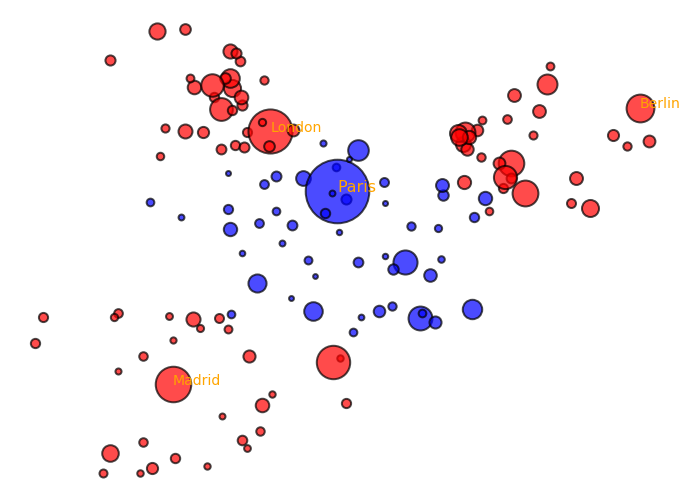

In [17]:
plot_map(X,Y, balanced=False, label=label, a=a, b=b)

**Solving Kantorovich Problem**

In [19]:
C = get_distance_from_lat_long(X, Y)
print(C.shape)
res, P = solve_cvxpy(C,a,b,precision=10e-7, verbose=False)

(50, 90)


We can check that the optimal coupling $P^\star$ is a sparse matrix
with less than $n+m-1$ non zero entries. An entry $P_{i,j}^\star \neq 0$
should be understood as a link between $x_{i}$
and $y_{j}$ where an amount of mass equal to $P_{i,j}^\star$ is transfered.

Number of non-zero: 137 (n + m-1 = 139)


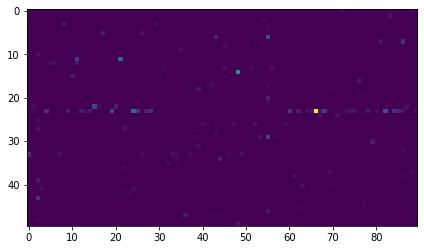

In [23]:
print("Number of non-zero: %d (n + m-1 = %d)" %(len(P.value[P.value>1e-6]), n + m-1))
plt.figure(figsize = (7,8))
P.value[P.value<=1e-6]=0
plt.imshow(P.value);

The matrix seems really sparse since Paris contains most of the mass in the blue group, the line corresponding of masses flowing from Paris is the line with the yellow pixel and this yellow pixel is the amount of mass flowing from Paris to London.

**Visualisation of the results**

We can see that there is now multiple connections between cities. For example Paris is connected to multiple cities.

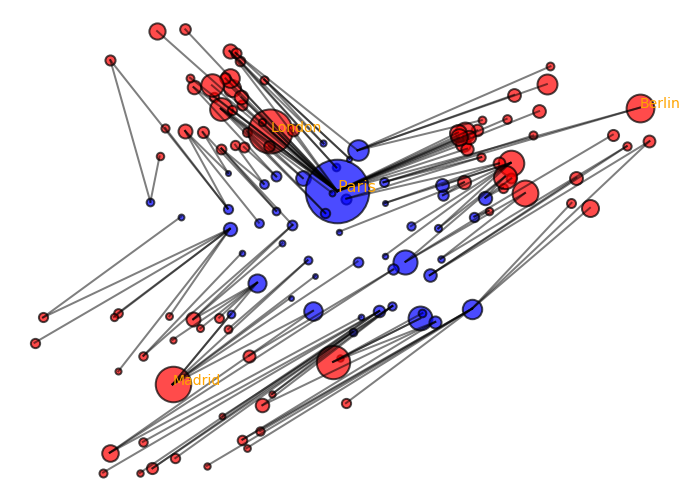

In [24]:
plot_map(X,Y, balanced=False, label=label, a=a, b=b, P=P.value)

**Displacement Interpolation**

For any $t \in [0,1]$, one can define a distribution $\mu_t$ such
that $t \mapsto \mu_t$ defines a **geodesic for the Wasserstein metric**.


Since the $W_2$ distance is a geodesic distance, this geodesic path solves the
following variational problem

$$ \mu_t = \uargmin{\mu} (1-t)W_2(\al,\mu)^2 + t W_2(\be,\mu)^2. $$
This can be understood as a generalization of the usual Euclidean
barycenter to barycenter of distribution. Indeed, in the case that
$\al = \de_{x}$ and $\be=\de_y$, one has $\mu_t=\de_{x_t}$ where $ x_t =
(1-t)x+t y $.


Once the optimal coupling $P^\star$ has been computed, the
interpolated distribution is obtained as

$$ \mu_t = \sum_{i,j} P^\star_{i,j} \de_{(1-t)x_{i} + t y_{j}}. $$

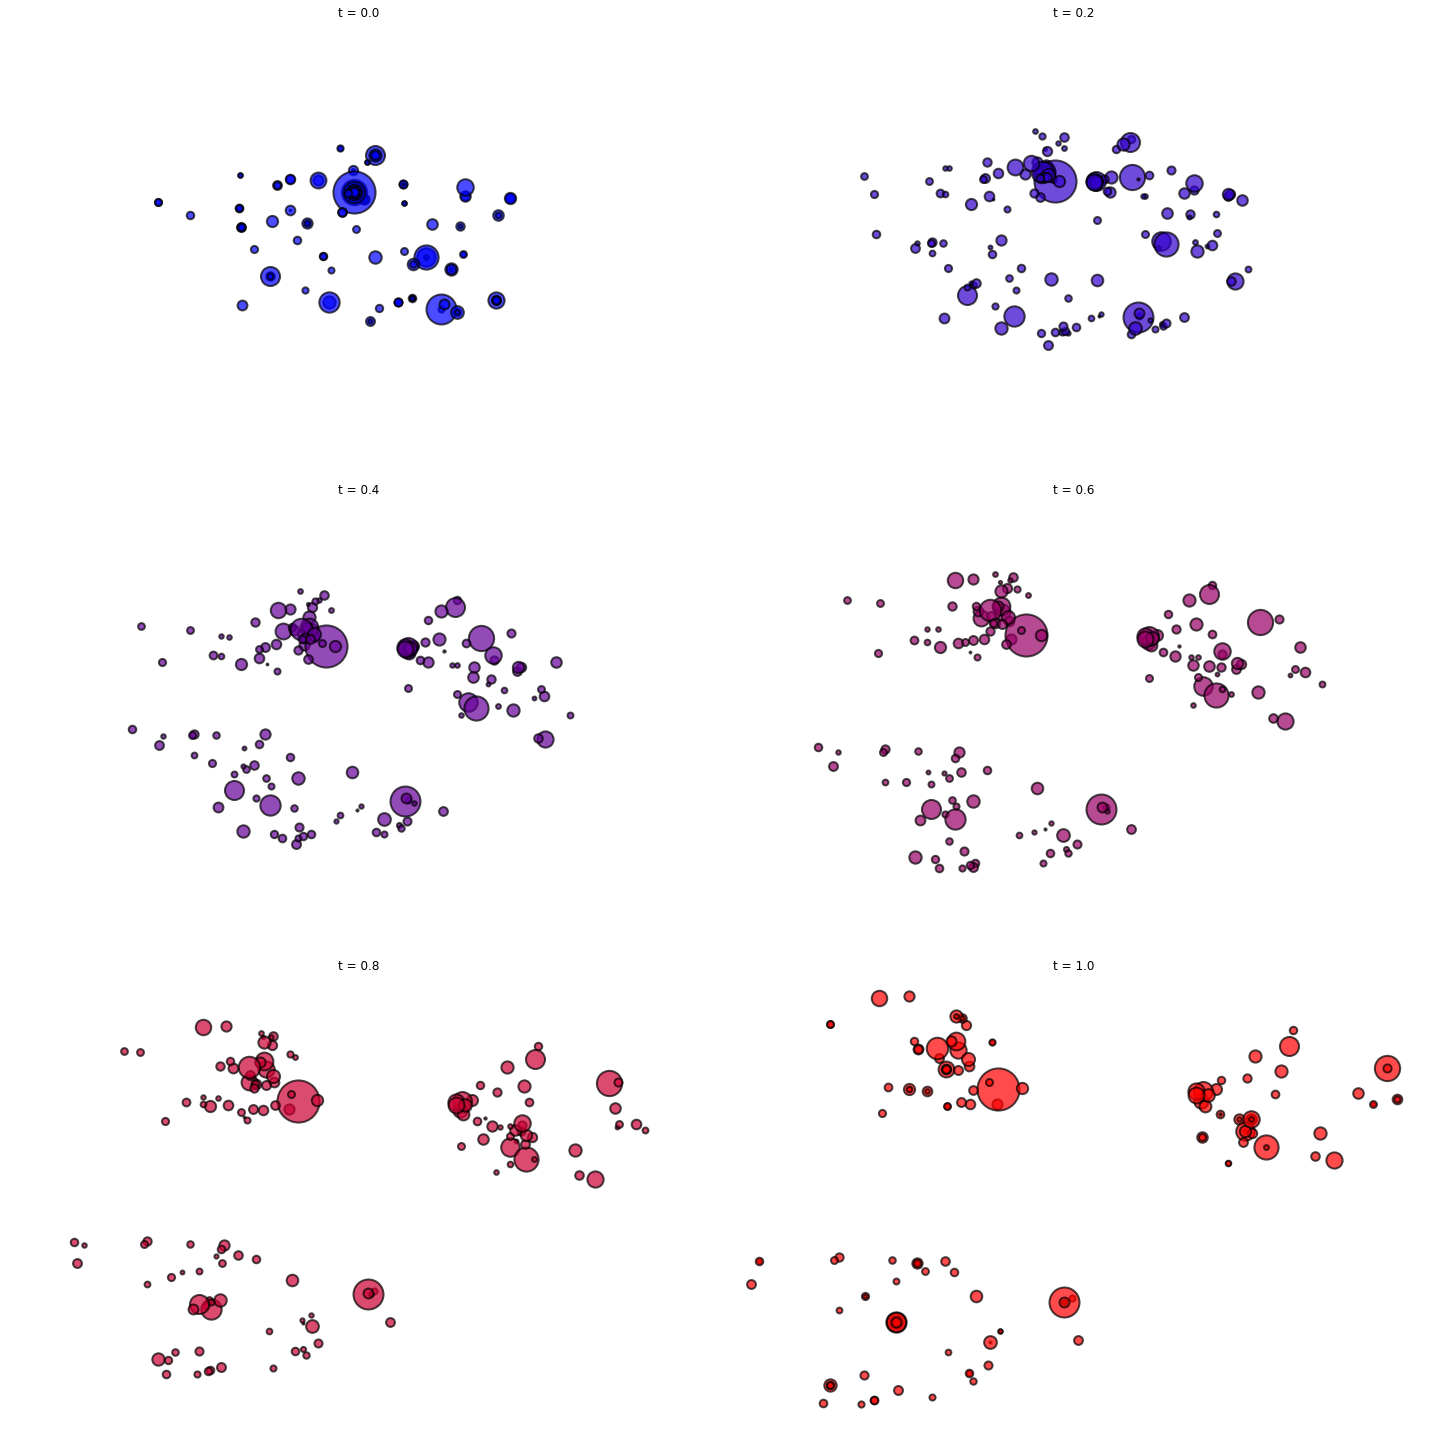

In [29]:
def plot_interpolate(X,Y,P):
    I,J = np.nonzero(P.value>1e-5)
    Pij = P.value[I,J]

    plt.figure(figsize =(20,20))
    tlist = np.linspace(0, 1, 6)
    for i in range(len(tlist)):
        t = tlist[i]
        Xt = (1-t)*X[:,I] + t*Y[:,J]
        plt.subplot(3,2,i+1)
        plt.axis("off")
        for j in range(len(Pij)):
            myplot(Xt[0,j],Xt[1,j],Pij[j]*len(Pij)*6,[[t,0,1-t]])
        plt.title("t = %.1f" %t) 
        plt.xlim(min(np.min(Y[0,:]), np.min(X[0,:]))-1 ,max(np.max(Y[0,:]), np.max(X[0,:]))+1)
        plt.ylim(min(np.min(Y[1,:]), np.min(X[1,:]))-1 ,max(np.max(Y[1,:]), np.max(X[1,:]))+1)
    plt.tight_layout()
    plt.show()
    
plot_interpolate(X,Y,P)

We see that Paris is progressively splitted in many parts flowing to Germany and England and that most of its mass is send to London.

This end this section on the first Numerical Tour.

# Entropic Regularization of Optimal Transport

In this section, we review the results of the second Numerical Tour. This numerical tours exposes the general methodology of regularizing the
optimal transport (OT) linear program using entropy. This allows to
derive fast computation algorithm based on iterative projections
according to a Kulback-Leiber divergence.

We consider two input histograms $a,b \in \Si_n$, where we denote the simplex in $\RR^n$
$$ \Si_n := \enscond{ a \in \RR_+^n }{ \sum_i a_i = 1 }.  $$
We consider the following discrete regularized transport
$$  W_\epsilon(a,b) := \umin{P \in U(a,b)} \dotp{C}{P} - \epsilon E(P).  $$
where the polytope of coupling is defined as
$$ U(a,b) := \enscond{P \in (\RR^+)^{n \times m}}{ P \ones_m = a, P^\top \ones_n = b },  $$
where $\ones_n := (1,\ldots,1)^\top \in \RR^n $,
and for $P \in \RR_+^{n \times m}$, we define its entropy as
$$ E(P) := -\sum_{i,j} P_{i,j} ( \log(P_{i,j}) - 1). $$


$\epsilon$ is the regularization stength and when $\epsilon=0$ one recovers the classical (discrete) optimal transport.

## Transport between point clouds

We will start by applying Sinkhorn algorithm for transport between point clouds using the same dataset as in part 1. 

We first test the method for two input measures that are uniform measures
(i.e. constant histograms) supported on two point clouds
(that do not necessarily have the same size).


We thus first load two points clouds $x=(x_i)_{i=1}^{n}, y=(y_i)_{i=1}^{m}, $
where $x_i, y_i \in \RR^2$.


Number of points in each cloud, $N=(n,m)$.

**Data**

We take n=58 cities in France as a source, and m=145 cities in Spain/England/Germany as a target.

In [30]:
# Get 57 biggest cities in France and 49 biggest cities in Spain, Germany and England
n = 58
m = 145
df_FR = df[df.iso2=="FR"].sort_values("population").iloc[-n:,:].sample(frac=1)
df_DE = df[df.iso2=="DE"].sort_values("population", ascending=False).iloc[:(m+2)//3,:].sample(frac=1)
df_ES = df[df.iso2=="ES"].sort_values("population", ascending=False).iloc[:(m+2)//3,:].sample(frac=1)
df_GB = df[df.iso2=="GB"].sort_values("population", ascending=False).iloc[:(m+2)//3,:].sample(frac=1)

# Keep only lat/long variables
df_FR.index = df_FR.city_ascii
df_FR = df_FR[["lng","lat"]]
df_DE.index = df_DE.city_ascii
df_DE = df_DE[["lng","lat"]]
df_ES.index = df_ES.city_ascii
df_ES = df_ES[["lng","lat"]]
df_GB.index = df_GB.city_ascii
df_GB = df_GB[["lng","lat"]]

# Convert to numpy array
X = df_FR.values.T
Y = np.hstack([df_DE.values.T,df_ES.values.T,df_GB.values.T])
print(X.shape, Y.shape)

# Get random weights
#normalize = lambda a: a/np.sum(a)
#a = normalize(np.random.rand(n, 1))
#b = np.random.rand(m//3, 1)
#b = normalize(np.tile(np.sort(b).reshape(-1)[::-1],3)).reshape(-1,1)

# Some labels for display
label = {"Paris":(-1,df_FR.index.to_list().index("Paris")),
         "Berlin":(0,df_DE.index.to_list().index("Berlin")),
         "Madrid":(1,df_ES.index.to_list().index("Madrid")),
         "London":(2,df_GB.index.to_list().index("London")),
        }

# Target uniform histogramms
a = np.ones(n)/n
b = np.ones(m)/m

(2, 58) (2, 145)


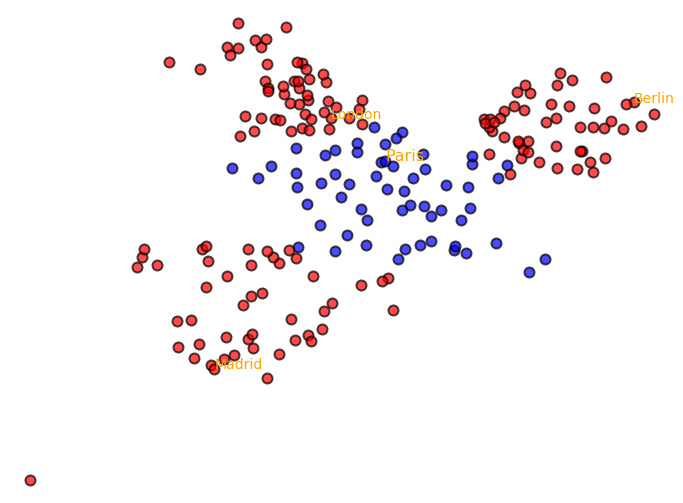

In [31]:
plot_map(X,Y,label=label)

**Cost Matrix** 

We take the same cost matrix as before using haversine distance. Since they are divisions involved in Sinkhorn, to avoid division by 0 error it is better to normalize the cost matrix.

In [34]:
# Cost matrix
C = get_distance_from_lat_long(X, Y)
print(C.shape)

# normalize cost matrix --- avoid error from Sinkhorn algorithm
C = (C.max()-C)/(C.max() - C.min())

(58, 145)


**Sinkhorn Algorithm**

Let's implement Sinkhorn Algorithm. 

A fundamental remark is that the optimality condition of the entropic regularized problem shows that the optimal coupling $P_\epsilon$ necessarily has the form 
$$P_\epsilon = \diag{u} K \diag{v}$$
where the Gibbs kernel is defined as
$$K := e^{-\frac{C}{\epsilon}}.$$

One thus needs to find two positive scaling vectors $u \in \RR_+^n$ and $v \in \RR_+^m$ such that the two following equality holds
$$P \ones  = u \odot (K v) = a 
\qandq
P^\top \ones  = v \odot (K^\top u) = b.$$

Sinkhorn's algorithm alternate between the resolution of these two equations, and reads
$$u \longleftarrow \frac{a}{K v} \qandq v \longleftarrow \frac{b}{K^\top u}.$$
This algorithm was shown to converge to a solution of the entropic regularized problem by [Sinkhorn](#biblio).

In [8]:
from numpy import linalg

def sinkhorn(C, a, b, tol=10-5, eps=.01, niter=1000):
    '''Given a cost matrix and two histogramms apply Sinkhorn to solve the regularized optimal transport'''
    
    n,m = len(a),len(b)
    
    # Initialisation
    v = np.ones(m)
    
    # Gibbs Kernel
    K = np.exp(-C/eps) 
    # Store the errors ||P 1 - a|| and  ||P^T 1 - b||
    error = np.zeros((2,niter))
    
    for i in range(niter):
        
        # Step 1
        u = a/np.dot(K,v)
        # Error ||P^T 1 - b||
        err1 = v*np.dot(np.transpose(K),u)
        error[0,i] = linalg.norm(err1 - b, 1)
        
        # Step 2
        v = b/np.dot(np.transpose(K),u)
        # Error ||P 1 - a||
        err2 = u*np.dot(K,v)
        error[1,i] = linalg.norm(err2 - a, 1)
        
    return u,v, error, K

In [36]:
u,v, error, K = sinkhorn(C,a,b,niter=5000, eps=0.001)
P = np.dot(np.dot(np.diag(u),K),np.diag(v))

**Display Error and visualise P**

We Display the evolution of the constraints satisfaction errors
$$ \norm{ P \ones - a }_1 \qandq \norm{ P^\top \ones - b } $$

In [11]:
def display_error(error): 
    plt.figure(figsize = (10,7))

    plt.subplot(2,1,1)
    plt.title("$||P 1 - a||$")
    plt.plot(np.log(error[0,:]), linewidth = 2)

    plt.subplot(2,1,2)
    plt.title("$||P^T 1 - b||$")
    plt.plot(np.log(error[1,:]), linewidth = 2)

    plt.show()

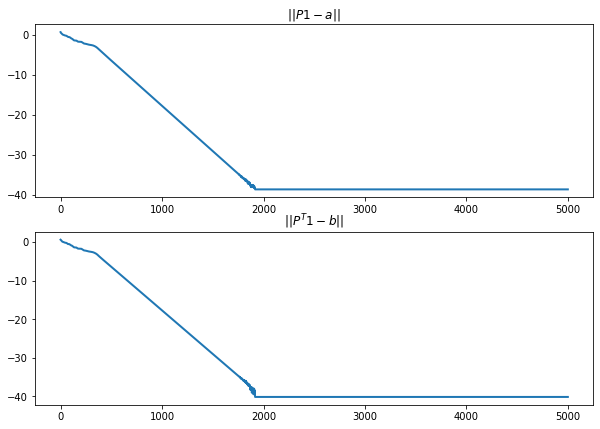

In [38]:
display_error(error)

We see that around 2000 iterations of Sinkhorn is enough to reach convergence. At 2000, the iterations reached the limit of Python precision.

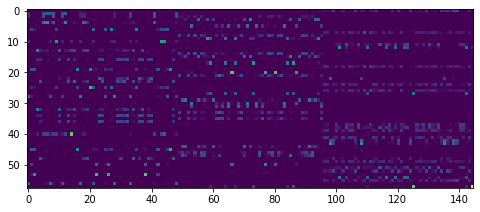

In [39]:
plt.figure(figsize=(8,8))
plt.imshow(P);

The matrix is quite sparse but less sparse than the matrix that we would have obtained using the non regularized version as shown as follow.

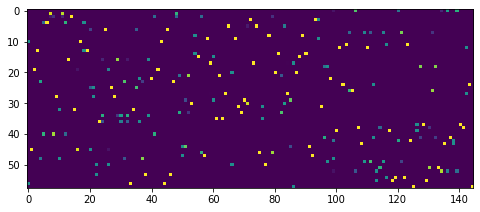

In [40]:
res, P = solve_cvxpy(C,a.reshape(-1,1),b.reshape(-1,1),precision=10e-7, verbose=False)
plt.figure(figsize = (8,8))
plt.imshow(P.value);

**Effect of $\epsilon$**

We compare the matrix $P^*$ for different values of espilon.

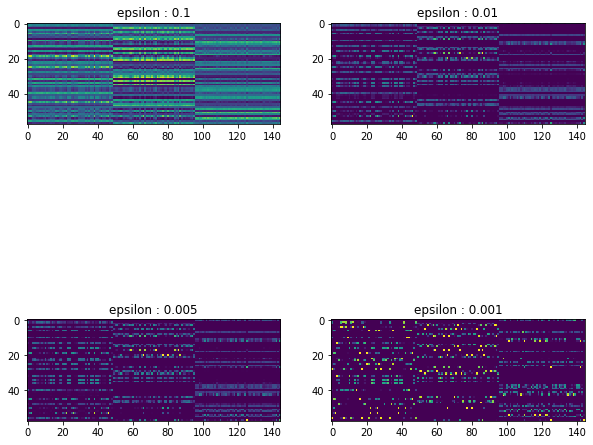

In [41]:
glist = [.1,.01,.005,.001]
niter = 2500

fig, axs = plt.subplots(2,2,figsize = (10,10))
for k, (i,j) in zip(range(len(glist)), [[0,0],[0,1],[1,0],[1,1]]):
    epsilon = glist[k]
    u,v, error, K = sinkhorn(C,a,b,niter=niter, eps=epsilon)
    P = np.dot(np.dot(np.diag(u),K),np.diag(v))   
    axs[i,j].imshow(np.clip(P,0,np.min(1/np.asarray((n,m)))*.3))
    axs[i,j].set_title("epsilon : {}".format(epsilon))

It seems that the image is constituted of three stacked matrices, this is because we have three clusters of cities and we did not shuffle between them. 

The smaller is epsilon the closer we are from the non relaxed Kantorovich problem and the sparsier is the array. The bigger epsilon the more the regularization and the closer we are to the "independent" case i.e the optimal coupling is the independent coupling between the two histogramms. It is important to notice that as soon as $\epsilon >0$ every coeeficient in the coupling matrix is non zero but they can stay really close to 0.

If we set $\epsilon$ too low as in the following cell, we will have underflow effect resulting in division by 0 in the Sinkhorn iterations.

In [68]:
np.min(np.exp(-C/10e-4))

0.0

**Display results**

Since Entropy approximation leads to a much less sparsier solution (actually all elements are non zero) we do not display all connections.

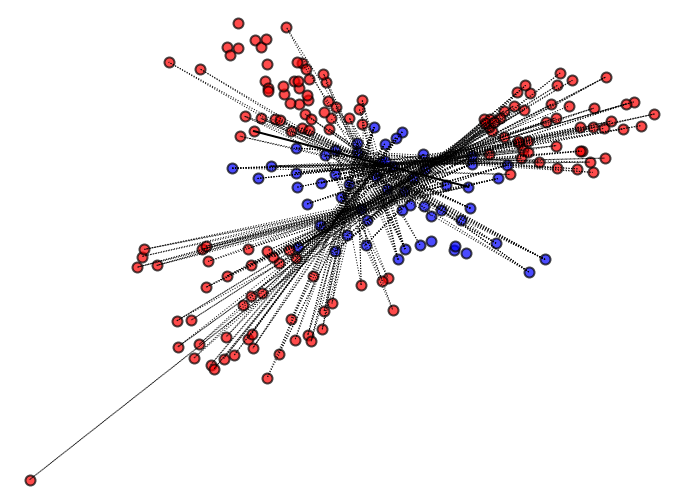

In [42]:
plot_map(X,Y,P=P,tol=(0.2,0.8))

## Transport between histogramms

We now consider a different setup, where the histogram values
$a,b$ are not uniform, but the measures are defined on a uniform grid
$x_i=y_i=i/n$. They are thue often refered to as "histograms".

Size $n$ of the histograms. The Gibbs kernel is a Gaussian convolution,
$$ K_{i,j} := e^{ -(i/N-j/N)^2/\epsilon }. $$

We will use two mixtures of Gaussian distributions (GMM) for this experiment.

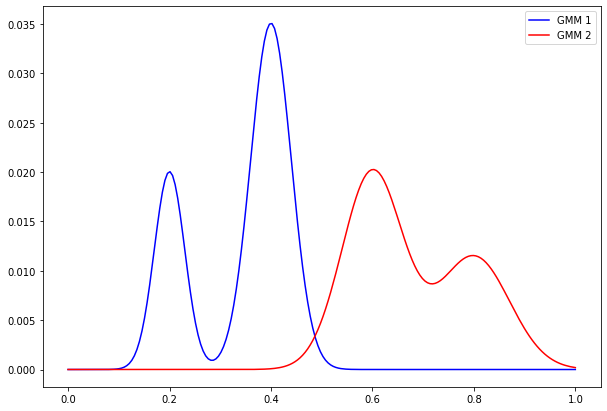

In [5]:
import scipy.stats as sps

def densite_theorique(mu,sigma,alpha,x):
    '''compute the 1D GMM density with parameters (mu,sigma) and weights alpha  at x'''
    K=mu.shape[0]
    y=0
    for j in range(K):
        y+=alpha[j]*sps.norm.pdf(x,loc=mu[j,:],scale=sigma[j,:,:])
    return y.reshape(x.shape)

# first GMM
d=1  # space dimension
pi0 = np.array([.3,.7])    
mu0 = np.array([[.2,.4]]).T
S0  = np.array([[[.03]],[[.04]]])
K0  = pi0.shape[0]

# second GMM
pi1 = np.array([.6,.4])    
mu1 = np.array([[.6,.8]]).T   
S1 = np.array([[[.06]],[[.07]]])
K1 = pi1.shape[0]

# GMM densities
N    = 200
x    = np.linspace(0,1,num=N)
vmin = .02;
gmm0 = densite_theorique(mu0,S0,pi0,x)
a = gmm0/gmm0.sum()
gmm1 = densite_theorique(mu1,S1,pi1,x)
b = gmm1/gmm1.sum()

#display densities
plt.figure(figsize = (10,7))
plt.plot(x,a,'b',label='GMM 1')
plt.plot(x,b,'r',label='GMM 2')
plt.legend();
plt.show()

In [6]:
# Regularization strength
epsilon = (.03)**2

# Cost matrix
[Y,X] = np.meshgrid(x,x)
C = (X-Y)**2

the only difference with the last section is the cost function. We thus re-use the same implementation of the Sinkhorn algorithm.

We display the evolution of the constraints satisfaction errors
$ \norm{ P \ones - a }_1, \norm{ P^\top \ones - b }_1$.

In [9]:
u,v, error, K = sinkhorn(C, a, b, eps=epsilon, niter=2500)
P = np.dot(np.dot(np.diag(u),K),np.diag(v))

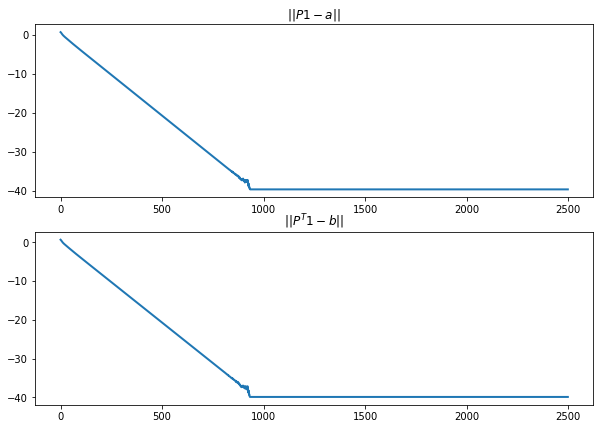

In [12]:
display_error(error)

Around 900 iterations is sufficient to reach Python's precision limit.

We now display the optimal coupling in a log domain plot. The pot package has a simple function to perform this task:

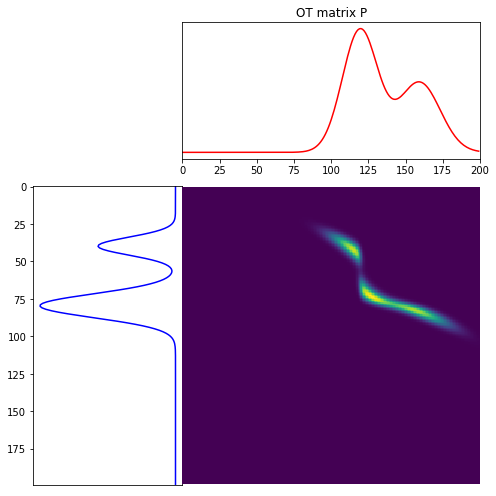

In [13]:
import ot.plot
plt.figure(3, figsize=(7, 7))
ot.plot.plot1D_mat(a, b, P, 'OT matrix P')

We see that the optimal coupling is not supported on the graph of a map $T$. It is however useful in many applications to get a transport map that assign a unique point to each point. 

One can compute an approximation of the Monge map between the two measure by computing the so-called barycentric projection map
$$ t_i \in [0,1] \longmapsto s_j := \frac{\sum_{j} P_{i,j} t_j }{ \sum_{j} P_{i,j} }
   =  \frac{ [u \odot K(v \odot t)]_j }{ a_i }. $$
where $\odot$ and $\frac{\cdot}{\cdot}$ are the enry-wise multiplication and division.


This computation can thus be done using only multiplication with the
kernel $K$.

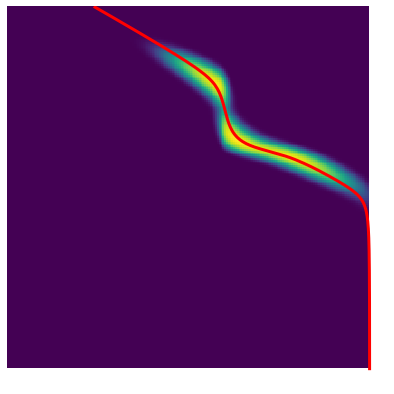

In [14]:
s = np.dot(K,v*x)*u/a
plt.figure(figsize=(7,7))
plt.imshow(np.log(P+1e-5))
plt.plot(s*N,x*N, 'r', linewidth=3);
plt.axis('off');

**Bonus** (1)

First let compare this approximation of the Monge map with the true Monge map obtained by minizing the non regularized OT problem.

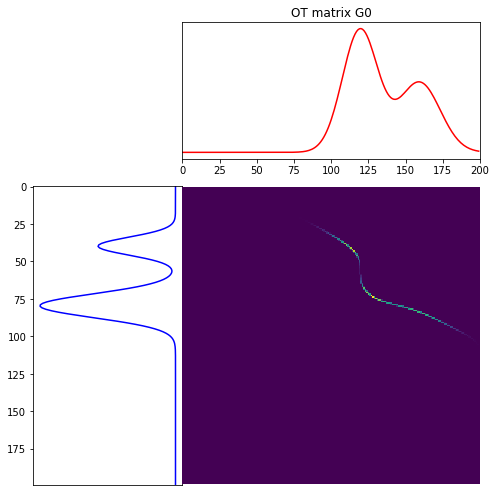

In [15]:
M = ot.dist(x.reshape(N, 1), x.reshape((N, 1)))
M /= M.max()
G0 = ot.emd(a, b, M)
plt.figure(3, figsize=(7, 7))
ot.plot.plot1D_mat(a, b, G0, 'OT matrix G0')

**Bonus** (2)

We try different regularization strength $\epsilon$.

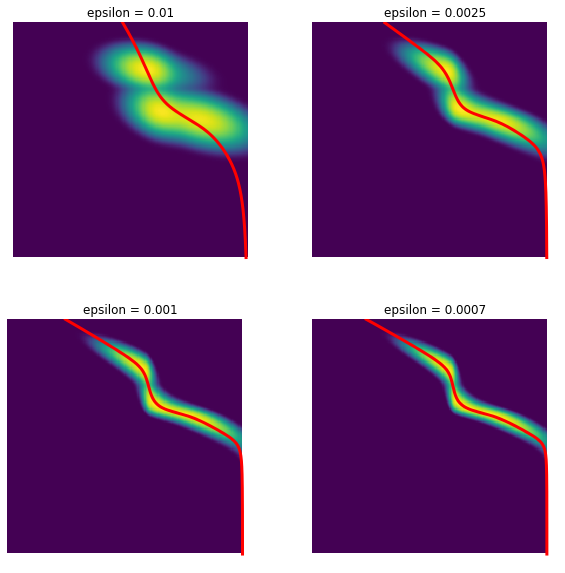

In [27]:
plt.figure(figsize = (10,10))
glist = [.01,.0025,.001,.0007]

for k in range(len(glist)):
    epsilon = glist[k]
    v = np.ones(N)
    u,v,_,K = sinkhorn(C, a, b, eps=epsilon, niter=2000)
    P = np.dot(np.dot(np.diag(u),K),np.diag(v))
    s = np.dot(K,v*x)*u/a
    plt.subplot(2,2,k+1)
    plt.imshow(np.log(P+1e-7))
    plt.plot(s*N,x*N, 'r', linewidth=3);
    plt.title("epsilon = {}".format(epsilon))
    plt.axis('off');

When epsilon is close to zero the optimal coupling is more "thin" and closer to the Monge map, the barycentric projection map is also closer to the true Monge map (see bonus (1)). The bigger epsilon the more spread out is the coupling and wee see that the batycentric projection map becomes less precise.

## Transport between histogramms (GPU version)

We will use here [Pytorch](https://pytorch.org/) to implement Sinkhorn on the GPU.

In [62]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print( device )

cuda:0


In [63]:
def Sinkhorn_GPU(X,Y,a,b,device,epsilon=(.06)**2, niter=2000):
    
    K = np.exp(-(X-Y)**2/epsilon)
    u = torch.ones(N);
    v = torch.ones(N);
    K1 = torch.from_numpy(K).type(torch.FloatTensor); 
    a1 = torch.from_numpy(a).type(torch.FloatTensor); 
    b1 = torch.from_numpy(b).type(torch.FloatTensor); 
    K1.to(device);
    u.to(device); v.to(device);
    a1.to(device); b1.to(device);
    error = np.zeros((2,niter))
    for i in range(niter):
        # sinkhorn step 1
        u = a1 / (K1 * v[None,:]).sum(1)    
        # error computation
        r = v*(K1 * u[:,None]).sum(0)
        error[0,i] = torch.norm(r - b1, p=1)
        # sinkhorn step 2
        v = b1 / (K1 * u[:,None]).sum(0)
        s = u*(K1 * v[None,:]).sum(1)
        error[1,i] = torch.norm(s - a1,p=1)
        
    return error

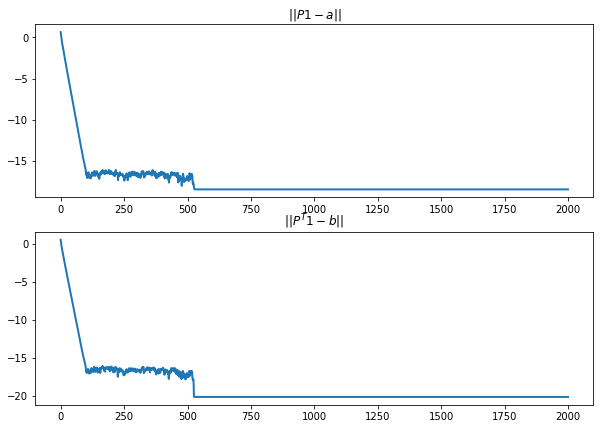

In [64]:
error = Sinkhorn_GPU(X,Y,a,b,device)
display_error(error)

Since CUDA uses float number on 32 bits, we use a larger value for $\epsilon$ to avoid overflow. Due to this lack of precision we see that the convergence is less stable. We will see in the next numerical tour how to apply the log-sum-exp stabilization trick to stabilize Sinkhorn in the log domain.

##  Wasserstein Barycenters

In [66]:
import torchvision

We will replicate the experiences of the numerical tour but for 2 other datasets: Mnist and Fashion Mnist. This is only for visual curiosity.

Instead of computing transport, we now turn to the problem of computing
barycenters of $R$ input measures $(a_k)_{k=1}^R$. A barycenter $b$ solves
$$ \umin{b} \sum_{k=1}^R \lambda_k W_\ga(a_k,b)  $$
where $\la_k$ are positive weights with $\sum_k \la_k=1$. This
follows the definition of barycenters proposed in
[AguehCarlier](#biblio).

**Mnist and Fashion Mnist**

Mnist is probably the most famous dataset for beginners in computer vision. Fashion Mnist is a recent adaptation of Mnist for clothes. Both dataset contains 10 classes of grayscale images of size 28*28.

In [69]:
# Import Mnist and Fashion Mnist Datasets
data_mnist = torchvision.datasets.MNIST(
    root = './data/MNIST',
    train = True,
    download = True,
    transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor()                                 
    ])
)

data_fashion = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor()                                 
    ])
)

print("Classes of Fashion MNIST")
idx_to_class = {v:k for k,v in data_fashion.class_to_idx.items()}
idx_to_class

Classes of Fashion MNIST


{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [85]:
def import_imgs(classes, data, labels):
    '''Load random images for different classes'''

    rescale = lambda x: (x-x.min())/(x.max()-x.min())
    N = 28
    A = np.zeros([N,N,len(classes)])
    R = 4
    
    plt.figure(figsize=(7,7))
    for i,cl in enumerate(classes):
        plt.subplot(2,2,i+1)
        data_cl = data.data[data.targets==cl,:,:]
        a = data_cl[np.random.randint(data_cl.shape[0])].numpy()
        plt.imshow(a.reshape(N,N), cmap="gray")
        a = rescale(a)
        A[:,:,i] = a
        
        plt.title(labels[i])
        plt.axis('off');
        
    return A

We sampled 4 images of each dataset.

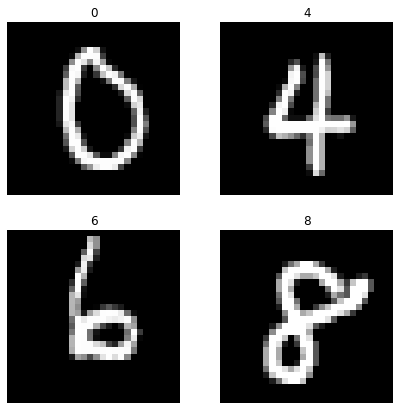

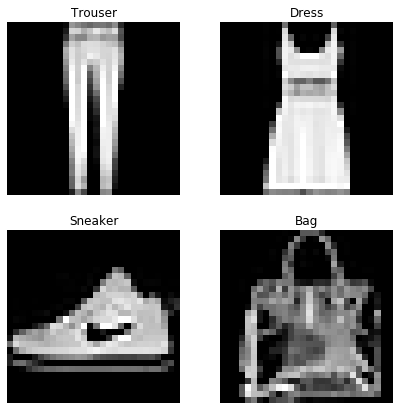

In [86]:
R = 4
classes = [0,4,6,8]
A1 = import_imgs(classes, data_mnist, classes)

classes = [1,3,7,8]
A2 = import_imgs(classes, data_fashion, [idx_to_class[cl] for cl in classes])

In this specific case, the kernel $K$ associated with the
squared Euclidean norm is a convolution with a Gaussian filter
$$ K_{i,j} = e^{ -\norm{i/N-j/N}^2/\epsilon } $$
where here $(i,j)$ are 2-D indexes.


The multiplication against the kernel, i.e. $K(a)$, 
can now be computed efficiently, using fast convolution methods. 
This crucial points was exploited and generalized in [SolomonEtAl](#biblio)
to design fast optimal transport algorithm.

We use here the fact that <font color=red>the convolution is separable</font> to implement it
using only 1-D convolution, which further speeds up computations.

It is shown in [BenamouEtAl](#biblio) that the problem of Barycenter computation
boilds down to
optimizing over couplings $(P_k)_{k=1}^R$, and that this can be achieved
using iterative a Sinkhorn-like algorithm, since the optimal coupling has the scaling form
$$P_k = \diag{u_k} K \diag{v_k}$$
for some unknown positive weights $(u_k,v_k)$.

The steps are the following:
- Initialize the scaling factors $(u_k,v_k)_k$, store them in matrices.
- The first step of the Bregman projection method corresponds to the
projection on the fixed marginals constraints $P^k \ones = a_k$. This
is achieved by updating
$$ \forall k=1,\ldots,R, \quad u_k \longleftarrow \frac{a_k}{ K( v_k ) }. $$
- The second step of the Bregman projection method corresponds to the
projection on the equal marginals constraints $\forall k, P_k^\top \ones=b$ for a common barycenter target $b$. This
is achieved by first computing the target barycenter $b$ using a geometric means
$$ \log(b) := \sum_k \lambda_k \log( u_{k} \odot K ( v_{k} ) ). $$
- And then one can update the scaling by a Sinkhorn step using this newly computed histogram $b$ as follow (note that $K=K^\top$ here):
$$ \forall k=1,\ldots,R, \quad v_{k} \longleftarrow \frac{b}{ K(u_{k}) }. $$

The following function implements the computation of iso-barycenters and plot the decay of the error $\sum_k \norm{P_k \ones - a_k} $.

In [77]:
def isobarycenter(A, niter, epsilon = ):
    
    N = A.shape[0]
    R = A.shape[2]
    t = np.linspace(0,1,N)
    [Y,X] = np.meshgrid(t,t)
    K1 = np.exp(-(X-Y)**2/epsilon)
    K = lambda x: np.dot(np.dot(K1,x),K1)
    lambd = np.ones(R)/R

    v = np.ones([N,N,R])
    u = np.copy(v)
    Err_q = np.zeros(niter)

    for i in range(niter):

        for k in range(R):
            Err_q[i] = Err_q[i] + linalg.norm(u[:,:,k]*K(v[:,:,k]) - A[:,:,k], 1)
            u[:,:,k] = A[:,:,k]/K(v[:,:,k])

        b = np.zeros(N)
        for k in range(R):
            b = b + lambd[k] * np.log(np.maximum(1e-19*np.ones(len(v[:,:,k])), v[:,:,k]*K(u[:,:,k])))
        b = np.exp(b)

        for k in range(R):
            v[:,:,k] = b/K(u[:,:,k])

    plt.figure(figsize=(7,5))
    plt.plot(np.log(Err_q),linewidth = 2)
    plt.show()
    
    return b

In [91]:
#b1=isobarycenter(A1,500, epsilon=(.04)**2)
#b2=isobarycenter(A2,500)

In [90]:
#plt.imshow(b1, cmap="gray")
#plt.axis('off');
#plt.imshow(b2,cmap="gray")
#plt.axis('off');

The following function implements the computation of barycenters for varying weights $\la$ corresponding to
a bilinear interpolation inside a square.

In [96]:
def barycenters(A, epsilon, niter):

    N=28
    t = np.linspace(0,1,N)
    [Y,X] = np.meshgrid(t,t)
    K1 = np.exp(-(X-Y)**2/epsilon)
    K = lambda x: np.dot(np.dot(K1,x),K1)

    m = 5
    [T,S] = np.meshgrid(np.linspace(0,1,m), np.linspace(0,1,m))
    T = np.ravel(T,order="F")
    S = np.ravel(S,order="F")

    plt.figure(figsize=(20,10))
    for j in range(m**2):
        # weights
        lambd = np.hstack((S[j]*T[j], (1-S[j])*T[j], S[j]*(1-T[j]), (1-S[j])*(1-T[j])))
        # computation
        v = np.ones([N,N,R])
        u = np.copy(v)

        for i in range(niter):
            for k in range(R):
                u[:,:,k] = A[:,:,k]/K(v[:,:,k])
            b = np.zeros(N)
            for k in range(R):
                b = b + lambd[k] * np.log(np.maximum(1e-19*np.ones(len(v[:,:,k])), v[:,:,k]*K(u[:,:,k])))
            b = np.exp(b)
            for k in range(R):
                v[:,:,k] = b/K(u[:,:,k])

        # display
        plt.subplot(m,m,j+1)
        plt.imshow(b, cmap="gray")
        plt.axis('off')

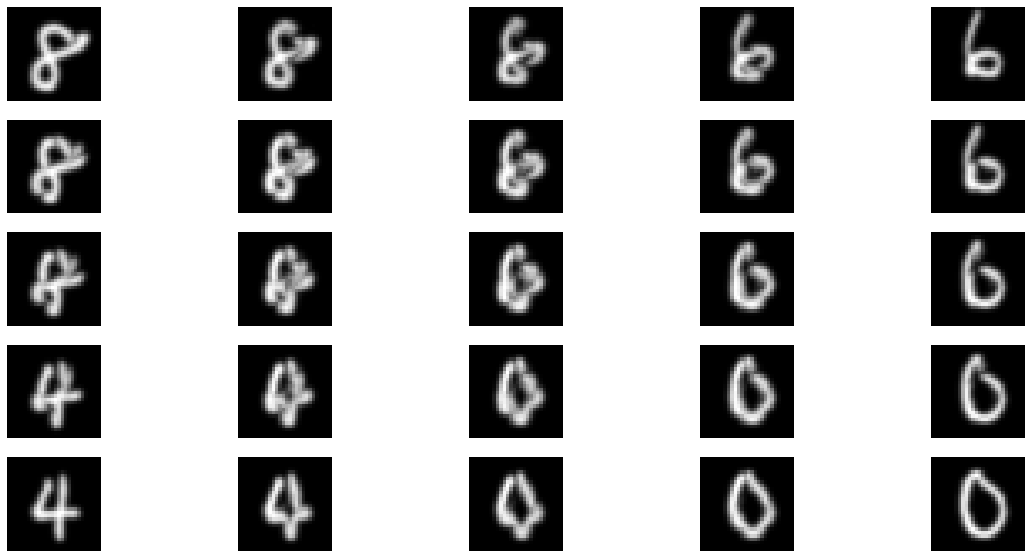

In [97]:
barycenters(A1, (.04)**2, 500)

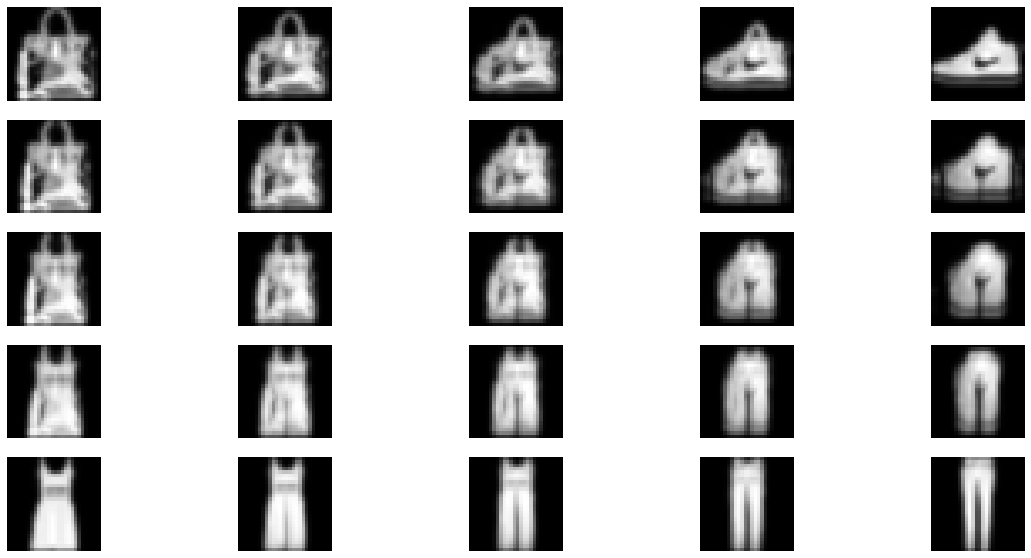

In [99]:
barycenters(A2, (.04)**2, 500)

Despite the low quality of the MNIST datasets we see some interesting details. For example on the top row of the barycentric interpolation for the Fashion MNIST we see the shadow area on the bag being progressively transformed into a Nike sign. Or in the last row the dress is simply cut in half at the bottom to be transformed into a trouser.

In both cases the iso-barycenter (in the middle) has a weird shape. Since 8,6,4 and 0 have curvatures the iso-barycenter looks like a 0. The iso-barycenter of the Fashion MNIST looks like a dungarees since we still have the handle of the bag that looks like braces and the bottom half is split in two like the trouser.

# Advanced Topics on Sinkhorn Algorithm

<font color= red> ?????????????? SEE BOOK ???????? </font>

$$\log{\sum_{i=1}^n e^{x_i}} = a + \log{\sum_{i=1n}^n e^{x_i-a}}$$

## Log-domain Sinkhorn 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

ModuleNotFoundError: No module named 'cv2'

In [189]:
n = 200
m = 300
a = np.ones((n,1))/n
b = np.ones((1,m))/m

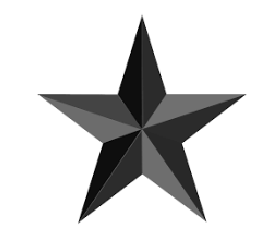

In [190]:
im1 = cv2.imread('star.png',0)
im1 = cv2.resize(im1,(200,200))
plt.imshow(im1, cmap="gray")
plt.axis("off");

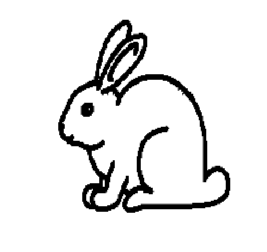

In [191]:
im2 = cv2.imread('rabbit.png',0)
im2 = cv2.resize(im,(400,400))
plt.imshow(im2, cmap="gray")
plt.axis("off");

In [192]:
def extract_point_from_shape(im, n, scale,rot):
    '''From a numpy array this function return black points allowing to extracting shapes'''

    im[im<255]=0
    
    im= cv2.rotate(im,0)
    I,J = np.where(im==0)
    sample_idx = np.random.choice(len(I), n)
    x = np.array([I[sample_idx],J[sample_idx]])
    x = x/x.max()*scale+rot
    
    return x

In [197]:
x = extract_point_from_shape(im1,n,1,0)
y = extract_point_from_shape(im2,m,1,0)

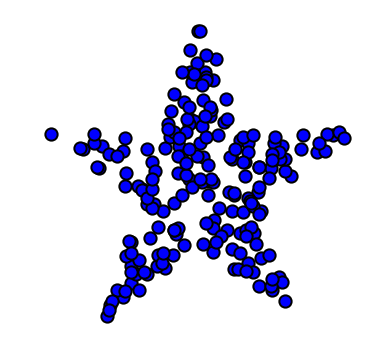

In [209]:
plotp = lambda x,col: plt.scatter(x[0,:], x[1,:], s=150, edgecolors="k", c=col, linewidths=2)
plt.figure(figsize=(6,6))
plotp(x, 'b')
plt.axis("off");

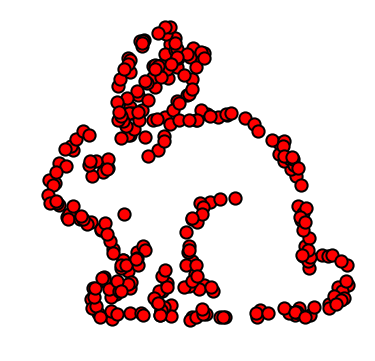

In [210]:
plt.figure(figsize=(6,6))
plotp(y, 'r')
plt.axis("off");

In [200]:
def distmat(x,y):
    return np.sum(x**2,0)[:,None] + np.sum(y**2,0)[None,:] - 2*x.transpose().dot(y)
C = distmat(x,y)

Sinkhorn algorithm is originally implemented using matrix-vector
multipliciation, which is unstable for small epsilon.
Here we consider a log-domain implementation, which operates by
iteratively updating so-called Kantorovitch dual potentials $ (f,g) \in \RR^n \times \RR^m $.


The update are obtained by regularized c-transform, which reads
$$ f_i \leftarrow {\min}_\epsilon^b( C_{i,\cdot} - g ) $$
$$ g_j \leftarrow {\min}_\epsilon^a( C_{\cdot,j} - f ),  $$
where the regularized minimum operator reads
$$ {\min}_\epsilon^a(h) := -\epsilon \log \sum_i a_i e^{-h_i/\epsilon}. $$

The regularized min operator defined this way is non-stable, but it can
be stabilized using the celebrated log-sum-exp trick, wich relies on the
fact that for any constant $c \in \RR$, one has
$$ {\min}_\epsilon^a(h+c) = {\min}_\epsilon^a(h) + c,  $$
and stabilization is achieved using $c=\min(h)$.

<font color=red> Proof of the log-sum-exp trick: </font>
$$y = -\epsilon \log \sum_i a_i e^{-h_i/\epsilon}$$
$$\Leftrightarrow e^{-y/\epsilon} = \sum_i a_i e^{-h_i/\epsilon}$$
$$\Leftrightarrow e^{-(y+c)/\epsilon} = \sum_i a_i e^{-(h_i+c)/\epsilon}$$
$$\Leftrightarrow y+c = -\epsilon \log \sum_i a_i e^{-(h_i+c)/\epsilon}$$
$$\Leftrightarrow {\min}_\epsilon^a(h+c) = {\min}_\epsilon^a(h) + c$$

With $c=-\min(h)$ the lowest value in the expectation is zero.



In [201]:
# Regularized c-transform
def mina_u(H,epsilon): return -epsilon*np.log( np.sum(a * np.exp(-H/epsilon),0) )
def minb_u(H,epsilon): return -epsilon*np.log( np.sum(b * np.exp(-H/epsilon),1) )
# Regularized c-transform with log-sum-exp trick
def mina(H,epsilon): return mina_u(H-np.min(H,0),epsilon) + np.min(H,0);
def minb(H,epsilon): return minb_u(H-np.min(H,1)[:,None],epsilon) + np.min(H,1);

In [202]:
def log_sinkhorn(C,epsilon,f,niter = 500):    
    '''Implement log-domain Sinkhorn'''
    
    Err = np.zeros(niter)
    for it in range(niter):
        g = mina(C-f[:,None],epsilon)
        f = minb(C-g[None,:],epsilon)
        # generate the coupling
        P = a * np.exp((f[:,None]+g[None,:]-C)/epsilon) * b
        # check conservation of mass
        Err[it] = np.linalg.norm(np.sum(P,0)-b,1)
    return (P,Err)

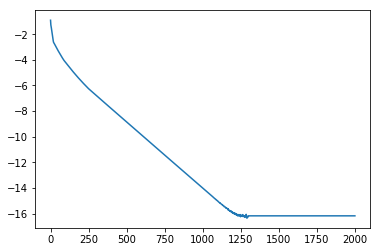

In [203]:
# run with 0 initialization for the potential f
(P,Err) =  log_sinkhorn(C,.01,np.zeros(n),2000)  
plt.plot(np.log10(Err));

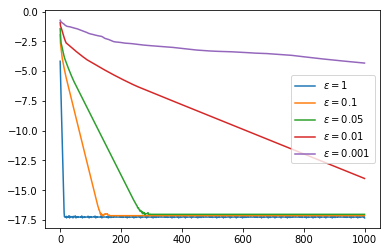

In [204]:
for epsilon in (1,.1, .05, .01, .001):
    (P,Err) =  log_sinkhorn(C,epsilon,np.zeros(n),1000)  
    plt.plot(np.log10(Err), label='$\epsilon=$' + str(epsilon))
plt.legend();

## Wasserstein Flow for Matching 

We aim at performing a "Lagrangian" gradient (also called Wasserstein flow) descent of Wasserstein
distance, in order to perform a non-parametric fitting. This corresponds
to minimizing the energy function
$$ \Ee(z) := W_\epsilon\pa{ \frac{1}{n}\sum_i \de_{z_i}, \frac{1}{m}\sum_i \de_{y_i} }. $$


Here we have denoted the Sinkhorn score as
$$ W_\epsilon(\al,\be) := \dotp{P}{C} - \epsilon \text{KL}(P|ab^\top)$$
where $\al=\frac{1}{n}\sum_i \de_{x_i}$ and
$\be=\frac{1}{m}\sum_i \de_{y_i}$ are the measures (beware that $C$
depends on the points positions).

The gradient of this energy reads
$$ ( \nabla \Ee(z) )_i = \sum_j P_{i,j}(z_i-y_j) = a_i z_i - \sum_j P_{i,j} y_j,  $$
where $P$ is the optimal coupling. It is better to consider a renormalized gradient, which corresponds
to using the inner product associated to the measure $a$ on the
deformation field, in which case
$$ ( \bar\nabla \Ee(z) )_i = z_i - \bar y_i   \qwhereq \bar y_i := \frac{\sum_j P_{i,j} y_j}{a_i}.  $$
Here $\bar y_i$ is often called the "barycentric projection" associated
to the coupling matrix $P$.


First run Sinkhorn, beware you need to recompute the cost matrix at each step.

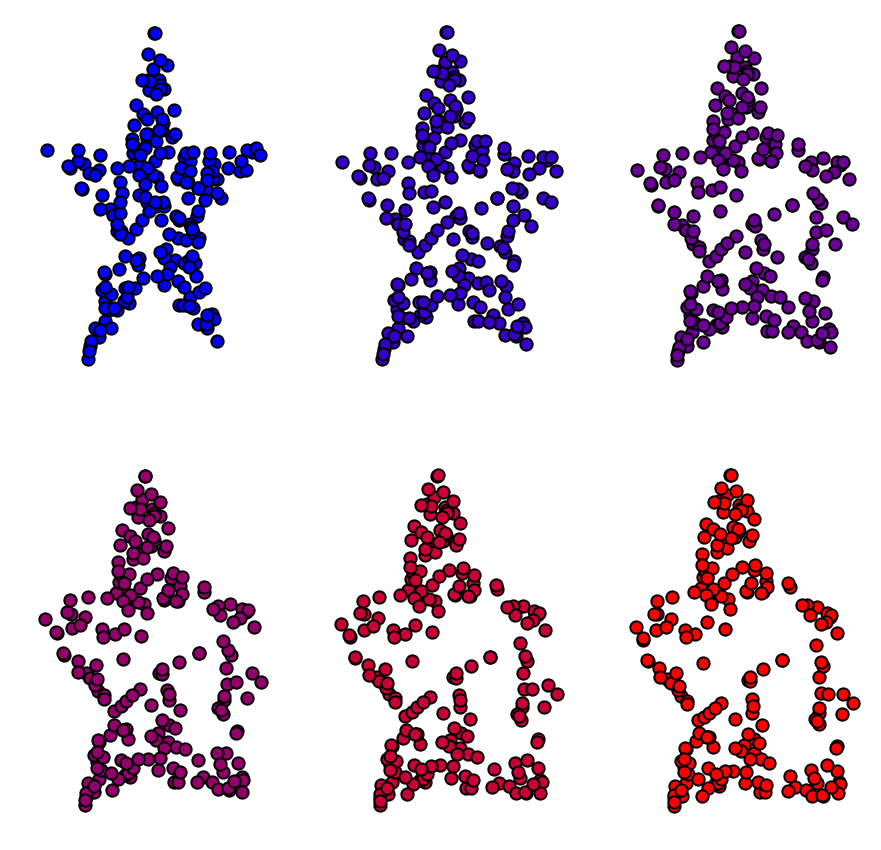

In [212]:
plt.figure(figsize=(15,15))
epsilon = .01
niter = 300
z = x; # initialization
tau = .03; # step size for the descent 
giter = 20; # iter for the gradient descent
ndisp = np.round( np.linspace(0,giter-1,6) )
kdisp = 0
f = np.zeros(n) # use warm restart in the following
for j in range(giter):
    # drawing
    if ndisp[kdisp]==j:        
        plt.subplot(2,3,kdisp+1)
        s = j/(giter-1)
        col = np.array([s,0,1-s])[None,:]
        plotp(z, col )
        plt.axis("off")
        kdisp = kdisp+1
    # Sinkhorn
    (P,Err) = log_sinkhorn(distmat(z,y), epsilon,f,niter)
    # gradient
    G = z - ( y.dot(P.transpose()) ) / a.transpose()
    z = z - tau * G;